In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
from keras.utils.vis_utils import plot_model

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
encoder=tf.keras.models.Sequential([
  tf.keras.Input(shape=(28,28),name="Image In"),
  tf.keras.layers.Flatten(name="Flatten"),
  tf.keras.layers.Dense(64, activation='relu',name="Dense1"),
],name="Encoder")

decoder=tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation="relu",name="Dense2"),
  tf.keras.layers.Reshape((28,28),name="Reshape")
],name="Decoder")

autoencoder = tf.keras.models.Sequential([
  encoder,
  decoder
])


In [4]:
opt = tf.keras.optimizers.Adam()
autoencoder.compile(opt,loss="mse")

In [5]:
autoencoder.build((None,28,28))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoder (Sequential)         (None, 64)                50240     
_________________________________________________________________
Decoder (Sequential)         (None, 28, 28)            50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.fit(x_train,x_train,epochs=2,batch_size=32,validation_split=0.1)


Epoch 1/2
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0286 - val_loss: 0.0120
Epoch 2/2
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0117 - val_loss: 0.0108


In [7]:
def showAutoencoder(imNumber):
    example=autoencoder.predict([x_test[imNumber].reshape(-1,28,28)])[0]
    midway=encoder.predict([x_test[imNumber].reshape(-1,28,28)])[0].reshape(8,8)

    fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(10,5))

    ax1.imshow(x_test[imNumber],cmap="gray")
    ax2.imshow(midway,cmap="gray")
    ax3.imshow(example,cmap="gray")
    plt.show()

Consider rewriting this model with the Functional API.


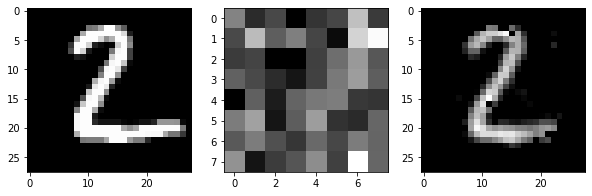

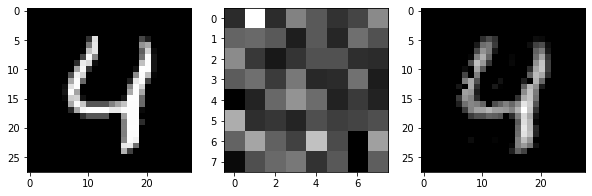

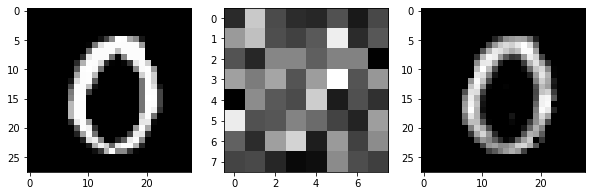

In [8]:
showAutoencoder(1)
showAutoencoder(4)
showAutoencoder(13)

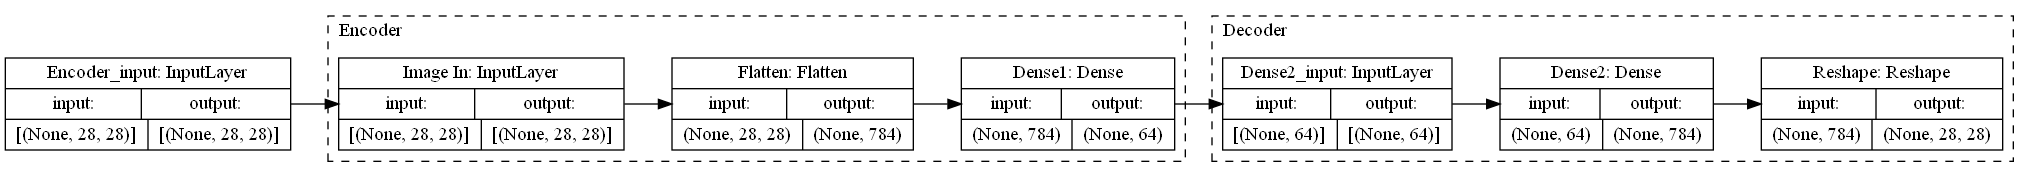

In [9]:
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True,expand_nested=True,rankdir="LR",)